In [1]:
library(knitr)
library(sqldf)
library(ggplot2)
library(mongolite)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(tidyr)
library(jsonlite)
library(lubridate)
library(gridExtra)
library(GGally)
library(scales)
library(memisc)
library(sp)
library(rgeos)
library(rgdal)
library(maptools)
library(RColorBrewer)
library(maps)
library(grid)
library(cluster)
library(StatMatch)
library(fastcluster)
library(factoextra)
library(stringr)
library(googleVis)
library(RMySQL)
library(data.table)
library(dbplyr)
library(DBI)
library(httr)
library(slam)
library(tm)
library(ldatuning)
library(udpipe)
library(egg)
library(NLP)
library(RTextTools)
library(broom)
library(tidytext)
library(sparklyr)
library(topicmodels)
library(readr)
library(wordcloud)
library(lexicon)
library(cowplot)
library(syuzhet)
library(coreNLP)
library(sentimentr)
library(quanteda)
library(cowplot)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Loading required package: lattice
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'memisc'

The following object is masked from 'package:scales':

    percent

The following object is masked from 'package:lubridate':

    is.interval

The following objects are masked from 'package:dplyr':

    collect, recode, rename, syms

The following objec

In [2]:
plot.format <- theme(axis.text = element_text(size = 12), legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.title = element_text(size = 14), plot.title = element_text(size = 14))

In [141]:
doc.udp.lem.text_mod <- read.csv("../Topic modelling/Files/Lexicon\\doc_udp_lem_text_mod_clean.csv", 
              stringsAsFactors=FALSE)

In [4]:
doc.udp.lem.text_mod.unqdoc <- doc.udp.lem.text_mod %>% distinct(text_mod.clean)

In [5]:
NROW(doc.udp.lem.text_mod.unqdoc)

[1] 302336

In [5]:
str(doc.udp.lem.text_mod.unqdoc)

'data.frame':	315304 obs. of  1 variable:
 $ text_mod: chr  "aa bo conner" "aa celebrity speak know j cole else" "aa leader arent focus disparage fact protester narrative expect ppl follow" "aa photo saint tlouis county cop assault yesterday http" ...


In [6]:
str(doc.udp.lem.text_mod)

'data.frame':	930682 obs. of  6 variables:
 $ sentence      : chr  "aa bo conners" "aa celebrities spoken know j cole else" "aa leaders arent focusing disparaging facts protesters narrative expecting ppl follow" "aa photos saint louis county cop assaulted yesterday http" ...
 $ text          : chr  "aa bo conner" "aa celebrity speak know j cole else" "aa leader arent focus disparage fact protester narrative expect ppl follow" "aa photo saint tlouis county cop assault yesterday http" ...
 $ text_mod      : chr  "aa bo conner" "aa celebrity speak know j cole else" "aa leader arent focus disparage fact protester narrative expect ppl follow" "aa photo saint tlouis county cop assault yesterday http" ...
 $ full_text_low : chr  " is over  aa and they have a bo conners " "has any aa celebrities spoken up and out about i know j cole has but who else " " aa leaders arent focusing on the disparaging facts between protesters narrative and their own  expecting ppl to follow " " aa a here are photo

In [142]:
sentiment.pos <- read.csv("../Sentiment/Files/Sentiment/sentiment_pos_nrc.csv", 
         stringsAsFactors = FALSE)

In [1253]:
str(sentiment.pos)

'data.frame':	902725 obs. of  27 variables:
 $ textnum              : num  1 2 4 5 17 18 25 32 38 43 ...
 $ retweeted            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ retweet              : int  0 0 0 0 1 1 1 0 1 0 ...
 $ favorited            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ favorite_count       : int  107 1 10 2 0 0 0 0 0 3 ...
 $ yday                 : int  221 221 221 221 221 221 221 221 221 221 ...
 $ possibly_sensitive   : logi  NA NA NA NA NA NA ...
 $ tweet_type           : chr  "All" "SB" "All" "All" ...
 $ keyword_pos_hash     : chr  "c(120, 128)" "c(87, 98, 96, 109)" "c(50, 60, 58, 67)" "c(25, 33)" ...
 $ keyword_count_hash   : int  1 2 2 1 2 2 2 2 2 1 ...
 $ full_text_low        : chr  "black teenage boys are not men they are children stop referring to a year old as a man you are killing children " " while there please tune in todays killing of the young black male in " "sick and tired of police killing unarmed people " "well here we go again "

In [143]:
docs.pos <- sentiment.pos #%>% filter(positive == 1)

In [144]:
docs.pos.text <- docs.pos %>% 
                inner_join(doc.udp.lem.text_mod[c("textnum", 
                                            "text_mod.clean")])

Joining, by = "textnum"


### Create bigram sfor LDA and any topic coherence calculations

In [145]:
tokens <- quanteda::tokens(unique(docs.pos.text$text_mod.clean))

In [146]:
bigrams <- quanteda::tokens_ngrams(tokens, n = 2L, skip = 0L, 
                                     concatenator = "_")

In [147]:
bigrams.dfm <- quanteda::dfm(bigrams)

In [148]:
bigrams.dtm <- quanteda::convert(bigrams.dfm, to = "tm")

In [11]:
nrow(bigrams.dtm)

[1] 294928

##### Remove common terms using term frequency, inverse document frequency

saveRDS(bigrams.dtm, 
        "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Lexicon\\Project\\bigrams_dtmv2.rds")

In [149]:
td.dfr.stats.bigrams <- tidy(bigrams.dtm) %>%
                    bind_tf_idf(document, term, count) %>%
                as.data.frame()

saveRDS(td.dfr.stats.bigrams, 
        "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Lexicon\\Project\\td_dfr_stats_bigrams.rds")

In [15]:
summary(td.dfr.stats.bigrams)

   document             term               count             tf           
 Length:1767193     Length:1767193     Min.   :1.000   Min.   :0.0002729  
 Class :character   Class :character   1st Qu.:1.000   1st Qu.:0.0400000  
 Mode  :character   Mode  :character   Median :1.000   Median :0.2500000  
                                       Mean   :1.002   Mean   :0.4174236  
                                       3rd Qu.:1.000   3rd Qu.:1.0000000  
                                       Max.   :8.000   Max.   :1.0000000  
      idf            tf_idf         
 Min.   :10.68   Min.   : 0.002948  
 1st Qu.:11.31   1st Qu.: 0.466344  
 Median :11.57   Median : 2.857952  
 Mean   :11.61   Mean   : 4.849188  
 3rd Qu.:11.72   3rd Qu.:11.314025  
 Max.   :13.51   Max.   :13.511249  

In [18]:
quantile(td.dfr.stats.bigrams$tf_idf, 0.2)

20% 
0.2929872

In [150]:
td.dfr.stats.vocab.bigrams <- subset(td.dfr.stats.bigrams, tf_idf >= quantile(tf_idf, 0.25) & tf_idf <= quantile(tf_idf, 0.9999))

In [17]:
summary(td.dfr.stats.vocab.bigrams)

   document             term               count             tf         
 Length:1325723     Length:1325723     Min.   :1.000   Min.   :0.03571  
 Class :character   Class :character   1st Qu.:1.000   1st Qu.:0.16667  
 Mode  :character   Mode  :character   Median :1.000   Median :0.50000  
                                       Mean   :1.001   Mean   :0.55187  
                                       3rd Qu.:1.000   3rd Qu.:1.00000  
                                       Max.   :8.000   Max.   :1.00000  
      idf            tf_idf       
 Min.   :10.68   Min.   : 0.4663  
 1st Qu.:11.31   1st Qu.: 1.9053  
 Median :11.57   Median : 5.7159  
 Mean   :11.62   Mean   : 6.4112  
 3rd Qu.:11.72   3rd Qu.:11.4318  
 Max.   :13.51   Max.   :13.5112  

saveRDS(td.dfr.stats.vocab.bigrams, 
        "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Lexicon\\Project\\td_dfr_stats_vocab_bigrams.rds")

In [151]:
bigrams.dtm.vocab <- cast_dtm(td.dfr.stats.vocab.bigrams, 
                                  "document", "term",
                             "count", weight = tm::weightTf)

saveRDS(bigrams.dtm.vocab, 
        "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Lexicon\\Project\\bigrams_dtm_vocabv2.rds")

In [19]:
str(bigrams.dtm.vocab)

List of 6
 $ i       : int [1:1325723] 1 2 3 4 5 6 1 1 7 8 ...
 $ j       : int [1:1325723] 1 1 1 1 1 1 2 3 3 3 ...
 $ v       : num [1:1325723] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 288421
 $ ncol    : int 732416
 $ dimnames:List of 2
  ..$ Docs : chr [1:288421] "text1" "text1396" "text1407" "text25509" ...
  ..$ Terms: chr [1:732416] "black_teenage" "teenage_child" "child_stop" "stop_refer" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


##### Sample 200 bigram terms

td.dfr.200 <- td.unigrams.stats.vocab %>% dplyr::select(one_of(c("term", 
                                                           "count"))) %>%
                            group_by(term) %>%
                                summarise(count = sum(count)) %>%
                            sample_n(200) %>%
                              arrange(desc(count)) %>%
                            filter(count < quantile(td.dfr.200$count, 0.92)) %>%
                            as.data.frame()

In [72]:
bigrams.dtm.all.vocab <- readRDS("../Topic modelling/Files/Lexicon/bigrams_dtm_all_vocab.rds")

In [73]:
td.bigrams.dtm.all.vocab <- tidy(bigrams.dtm.all.vocab)

In [ ]:
#### Random sample of 200 terms

In [85]:
set.seed(201902)
td.dfr.200 <- td.dfr.stats.vocab.bigrams %>% dplyr::select(one_of(c("term", 
                                                           "count"))) %>%
                            group_by(term) %>%
                                summarise(count = sum(count)) %>%
                            sample_n(200) %>%
                              arrange(desc(count)) %>%
                            filter(count < quantile(count, 0.95)) %>%
                            as.data.frame()

In [86]:
td.dfr.200$count_scale <- (td.dfr.200$count - min(td.dfr.200$count))/(max(td.dfr.200$count) - min(td.dfr.200$count))

In [ ]:
### Top 200 bigram terms in the corpus

In [80]:
useset <- brewer.pal(8, "Set2")

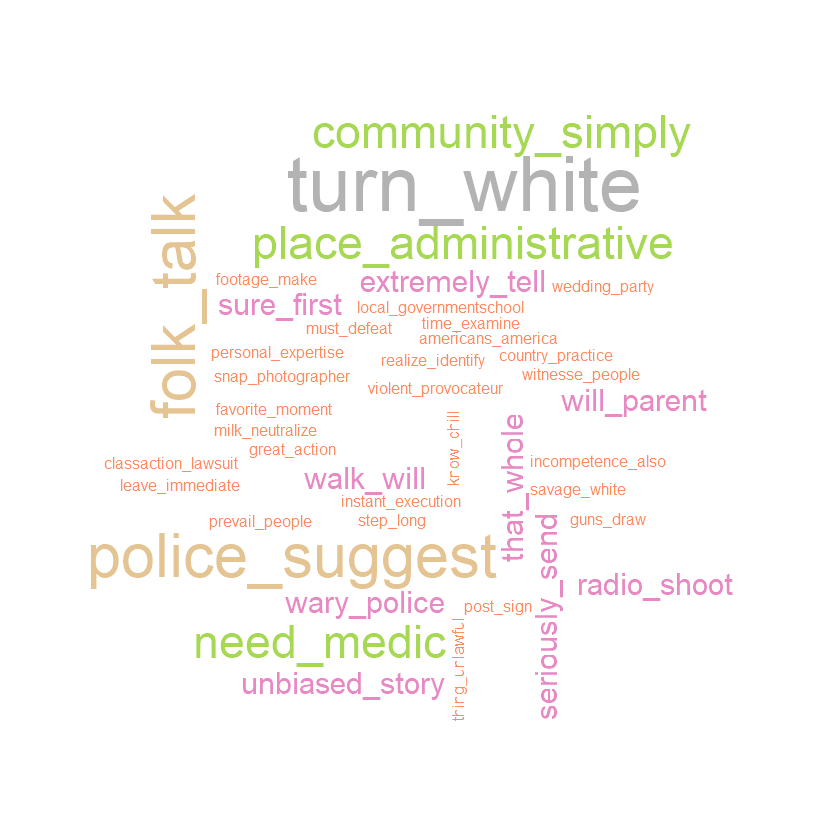

In [87]:
wordcloud(td.dfr.200$term, td.dfr.200$count_scale, scale = c(3.8, 0.001), random.color = FALSE, colors = useset)

### Build LDA to fine optimum number of topics

In [ ]:
#### Create a bigrams DocumentTerm Matrix for topicmodels LDA

In [ ]:
##### Create a train and test set for input to LDA

In [300]:
id <- seq(1, nrow(bigrams.dtm.vocab), 1)

In [301]:
set.seed(20181208)
samp_id <- id[sample(1:NROW(id), 
                                floor(0.75 * NROW(id)))]

In [302]:
train <- bigrams.dtm.vocab[samp_id, ]
test <- bigrams.dtm.vocab[-samp_id, ]

In [303]:
nrow(train)
nrow(test)

[1] 216315

[1] 72106

train$v <- round(train$v)
test$v <- round(test$v)

In [304]:
get_results <- list()
get_results.test <- list()
get_alpha <- list()
get_perplexity <- list()
get_perplexity.train  <- list()
#model.summary <- summary()
get_lda <- list()

In [306]:
ptm <- proc.time()
set.seed(20181208)
k <- c(seq(2, 10, 1), c(seq(15, 50, 5)))
for (i in k) {
  #  for(j in 1:length(alpha)) {
    results <- LDA(train, k = i,  #alpha= 50/i, 
               beta = 0.05, 
           method = "VEM", 
           control = list(keep = 10, seed = 20181209, 
                          estimate.alpha = TRUE, verbose = 1000,
                          em = list(iter.max = 1000), 
                          estimate.beta = FALSE))
    
    results.test <- LDA(test, model = results, verbose = 1000,
           control = list(em = list(iter.max = 1000), 
                          estimate.alpha = FALSE, 
                          estimate.beta = FALSE))

    if (i == 2) {
        get_results <- c(get_results, results)
        get_results.test <- c(get_results.test, results.test)
        get_lda <- results@alpha
        get_perplexity.train <- perplexity(results, train)
        get_perplexity <- perplexity(results, test)
    }
    else if (i > 2) {
        get_results <- c(get_results, results)
        get_results.test <- c(get_results.test, results.test)
        get_lda <- c(get_lda, results@alpha)
        get_perplexity.train <- c(get_perplexity.train, 
                                  perplexity(results, train))
        get_perplexity <- c(get_perplexity, perplexity(results, 
                                                       test))
        
    }
# }

}

proc.time() - ptm

final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216315
final e step document 72106
final e step document 216315
final e step document 216

   user  system elapsed 
1087.23   23.76 1152.28 

In [307]:
no.topics <- data.frame(no.topics = c(seq(2, 10, 1), c(seq(15, 50, 5))))

In [308]:
get_alpha.df <- data.frame(alpha = get_lda)

In [309]:
get_alpha.df <- cbind(get_alpha.df, no.topics)

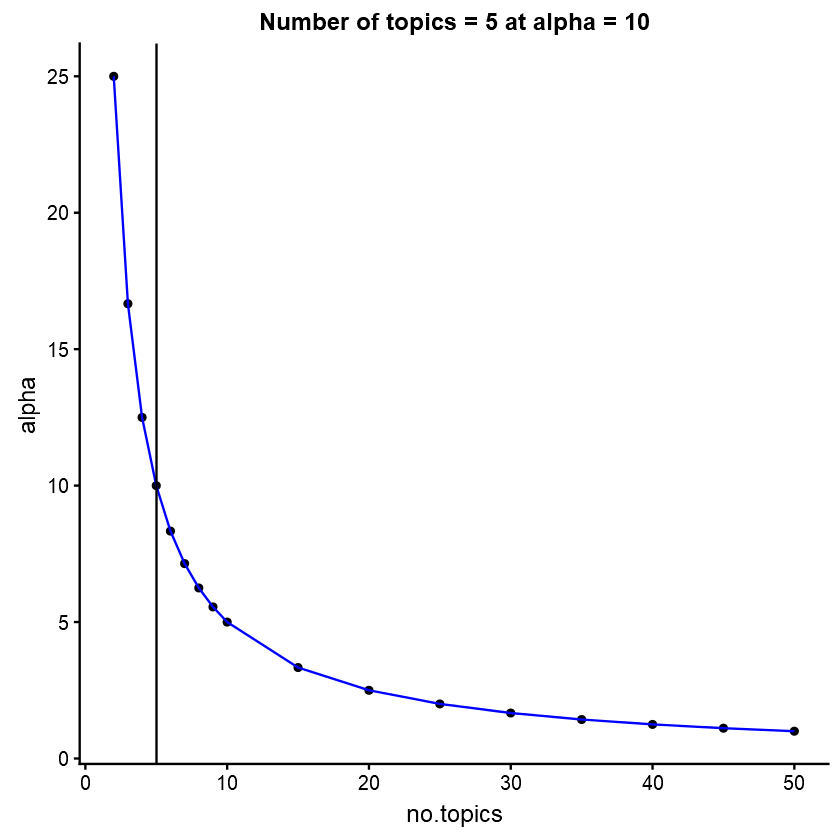

In [311]:
ggplot(aes(x = no.topics, y = alpha), data = get_alpha.df) +
geom_point() +
geom_line(color = "blue") +
geom_vline(xintercept=5) +
ggtitle("Number of topics = 5 at alpha = 10")

###### Get the number of topics based on perplexity of LDA model 

In [312]:
get.perplex.train.df <- data.frame(perplexity = get_perplexity.train, no.topics = no.topics$no.topics)

In [313]:
get.perplex.df <- data.frame(perplexity = get_perplexity, no.topics = no.topics$no.topics)

In [314]:
train.perplex <- ggplot(aes(x = no.topics), data = get.perplex.df) +
    geom_line(aes(y = perplexity), color = "medium blue", alpha = 0.8) +
    geom_point(aes(y = perplexity), color = "medium blue") +
       plot.format +
    theme(axis.text.x=element_text(angle=90))

In [315]:
test.perplex <- ggplot(aes(x = no.topics), data = get.perplex.df) +
    geom_line(aes(y = perplexity) , color = "medium purple", alpha = 0.5, data = get.perplex.train.df) +
    geom_point(aes(y = perplexity), color = "medium purple", 
               data = get.perplex.train.df) + 
    plot.format +
    theme(axis.text.x=element_text(angle=90))


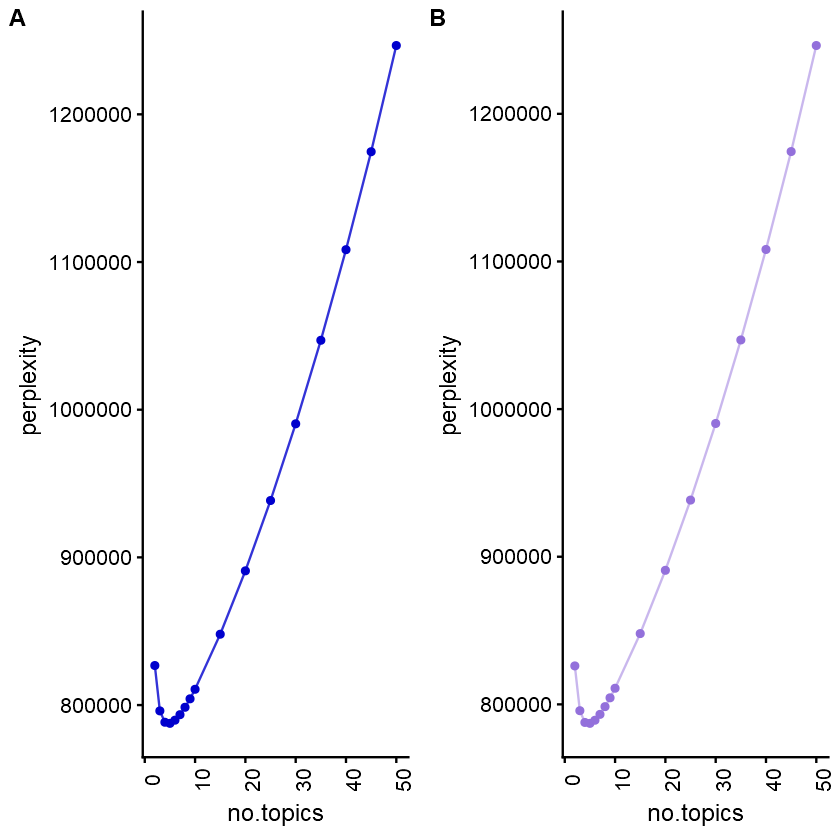

In [316]:
title <- ggdraw() + draw_label("No of topics ~= 5, 
at the minimum perplexity")#, fontface='bold')#, hjust = 0, vjust = -4)#, x = -1)
plot_grid(#title, 
    train.perplex, test.perplex, ncol = 2, labels = "AUTO",
          align = "v", axis = "l")#, rel_heights=c(0.1, 1))

In [ ]:
### Placeholders to write LDA model results

write.csv(get.perplex.df, "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Topics\\get_perplexity_bigram.csv")

write.csv(get.perplex.train.df, "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Topics\\get_perplexity_train_bigram.csv")

write.csv(get_alpha.df, "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Topics\\get_alpha_bigram.csv")

#### Run lda on full dataset using estimated alpha and no of topics k = 5

In [152]:
set.seed(20181208)
k <- 5
lda <- LDA(bigrams.dtm.vocab, k = k,  alpha= 50/k, beta = 0.05, 
           method = "VEM", 
           control = list(keep = 10, #estimate.alpha = FALSE, 
                          seed = 20181209,
                          em = list(iter.max = 1000), estimate.beta = FALSE))

    


In [30]:
head(bigrams.topic, 20)

topic,term,beta
1,black_teenage,1.089205e-06
2,black_teenage,2.393931e-06
3,black_teenage,2.703325e-06
4,black_teenage,2.540380e-06
5,black_teenage,2.163842e-06
1,teenage_child,6.499895e-07
2,teenage_child,1.113955e-06
3,teenage_child,3.544485e-07
4,teenage_child,2.698352e-06
5,teenage_child,1.941161e-06


In [153]:
bigrams.lda <- augment(lda)
bigrams.topic <- tidy(lda, matrix = "beta")
bigrams.doc <- tidy(lda, matrix = "gamma")

In [ ]:
##### Plot gamma distributions of topics over documents

In [89]:
doc.top.gamma <- bigrams.doc %>% group_by(document, topic) %>% arrange(desc(gamma)) %>%
                            ungroup() %>%
                            mutate(topic = as.character(topic)) %>%
                            as.data.frame()

In [90]:
tapply(doc.top.gamma$gamma, doc.top.gamma$topic, summary)

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1756  0.1969  0.1998  0.2000  0.2029  0.2353 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1778  0.1969  0.1998  0.2000  0.2029  0.2321 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1774  0.1969  0.1998  0.2000  0.2029  0.2302 

$`4`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1765  0.1969  0.1998  0.2000  0.2029  0.2411 

$`5`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1755  0.1969  0.1998  0.2000  0.2028  0.2365 


In [70]:
str(doc.top.gamma)

'data.frame':	4196980 obs. of  3 variables:
 $ document: chr  "742013" "113471" "306284" "232013" ...
 $ topic   : chr  "4" "5" "5" "4" ...
 $ gamma   : num  0.285 0.261 0.26 0.255 0.254 ...


In [75]:
doc.top.gamma <- bigrams.doc %>% group_by(document, topic) %>% arrange(desc(gamma)) %>%
                            ungroup() %>%
                            mutate(topic = as.character(topic)) %>%
                            as.data.frame()

In [87]:
plot.docs <- ggplot(aes(x = gamma), data = doc.top.gamma) +
geom_density(aes(color = topic, fill = topic)) +
scale_fill_discrete()+
labs(#title = "Documents assigned to topics has a narrow probability\n distribution of around mean = 0.21", 
    x = "gamma probabilities", y = "Count") +
theme(axis.text.x=element_text(angle=90)) +
facet_wrap(~topic)

In [ ]:
###### Plot beta distributions of terms over topics (top 1000 terms)

In [91]:
bigrams.lda.top1000 <- bigrams.topic %>% 
                            group_by(topic) %>%
                                arrange(topic, desc(beta)) %>%
                                slice(1:1000) %>%
                            ungroup() %>%
                            mutate(topic = as.character(topic)) %>%
                            as.data.frame()

In [92]:
bigrams.lda.top1000$beta_scale <- (bigrams.lda.top1000$beta- min(bigrams.lda.top1000$beta))/(max(bigrams.lda.top1000$beta) - min(bigrams.lda.top1000$beta))

In [93]:
tapply(bigrams.lda.top1000$beta_scale, bigrams.lda.top1000$topic, summary)

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3293  0.4274  0.5256  0.5278  0.6292  0.7345 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.09897 0.20770 0.20975 0.32115 0.42050 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2697  0.3769  0.4775  0.4809  0.5838  0.6933 

$`4`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5658  0.6676  0.7814  0.7802  0.8934  1.0000 

$`5`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3568  0.4523  0.5574  0.5595  0.6671  0.7782 


In [94]:
plot.terms <- ggplot(aes(x = beta_scale), data = bigrams.lda.top1000) +
geom_density(aes(color = topic, fill = topic)) +
#scale_fill_discrete()+
labs(#title = "Terms assigned to topics has a narrow probability\n distribution", 
    x = "beta probabilities (scaled 0 to 1)", y = "Count") +
theme(axis.text.x=element_text(angle=90)) +
facet_wrap(~topic)

In [272]:
head(bigrams.topic)

topic,term,beta
1,control_long,2.776260e-06
2,control_long,3.145385e-06
3,control_long,5.012724e-06
4,control_long,6.351120e-06
5,control_long,3.033724e-06
1,long_fucking,1.656755e-06


In [ ]:
#### Grid plot of gamma and beta probabilities

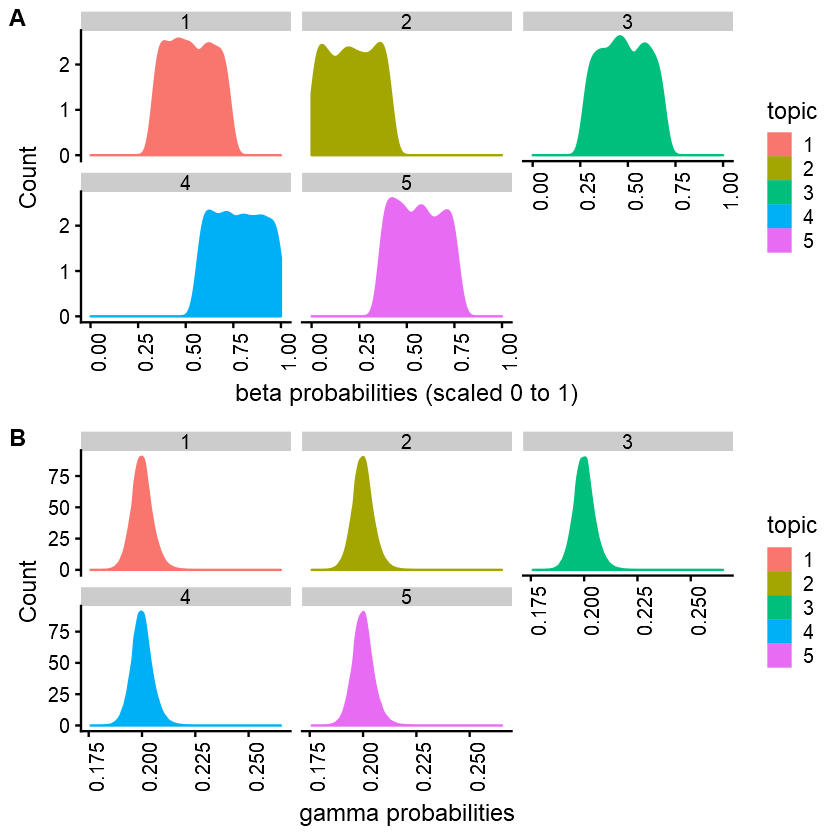

In [92]:
plot_grid(plot.terms, plot.docs, ncol = 1, labels = "AUTO",
          align = "v", axis = "l")

LDA assigns a term to one topic. Based on this assignment. The following wordclouds of the top 20 terms are plotted.

In [ ]:
#### Plot top 20 terms in a topic

In [154]:
bigrams.lda.top20 <- bigrams.topic %>% 
                            group_by(topic) %>%
                                arrange(topic, desc(beta)) %>%
                                slice(1:20) %>%
                            ungroup() %>%
                            mutate(topic = as.character(topic)) %>%
                            as.data.frame()

In [155]:
bigrams.lda.top20$beta_scale <- (bigrams.lda.top20$beta- min(bigrams.lda.top20$beta))/(max(bigrams.lda.top20$beta) - min(bigrams.lda.top20$beta))

In [156]:
useset <- brewer.pal(8, "Set1")

In [157]:
top20.tm <- spread(bigrams.lda.top20, "topic", "beta_scale") %>% dplyr::select(-beta) %>%
            dplyr::rename("t1" = `1`,
                         "t2" = `2`, 
                         "t3" = `3`, 
                         "t4" = `4`, 
                         "t5" = `5`)

In [158]:
top20.tm[ , c("t1", "t2", "t3", "t4", "t5")] <- sapply(top20.tm[ , c("t1", "t2", "t3", 
                                                                       "t4", "t5")], 
                                                         function(x) ifelse(is.na(x), 0, x))

In [159]:
rownames(top20.tm) <- top20.tm$term
top20.tm$term <- NULL

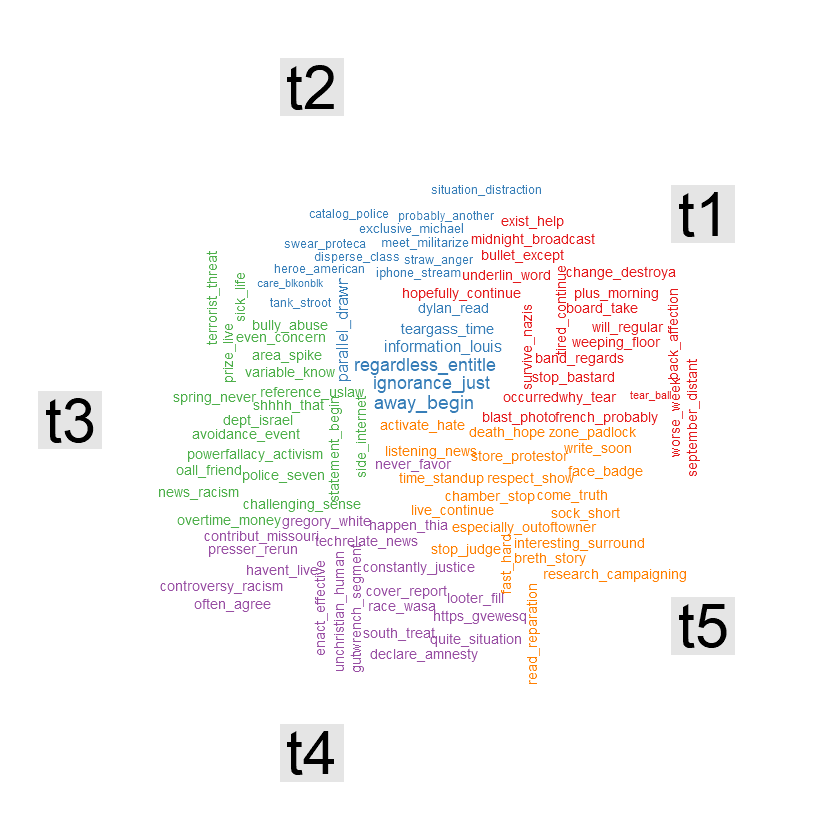

In [162]:
comparison.cloud(top20.tm, scale = c(0.9, 0.5), colors= useset, max.words
 = 150)

No clear overall topic sentiment or underlying theme including positive sentiment. The topic distribution over documents is also narrow.

Distribution of documents in topics is extremely narrow for all 5 
topics.
Note the same analysis was also done using unigrams. The results mirrored the above.
This shows the disadvantage of using LDA on short text found on Twitter. It however has the advantage of estimating number of topics for input into other topic modelling agorithms such as Single Value Decomposition (SVD) or Latent Semantic Analysis (LSA) using SVD, and Nonnegative Matrix Factorization(NNMF).

#### Calculate cooccurence for any topic coherence

In [183]:
bigrams.dtm.sp <- sparseMatrix(i=bigrams.dtm.vocab$i, j=bigrams.dtm.vocab$j, 
                           x=bigrams.dtm.vocab$v,  
               dims=c(bigrams.dtm.vocab$nrow, bigrams.dtm.vocab$ncol))  

In [184]:
#### Cooccurence matrix (number of documents in which terms occur together) - D(x, y)

In [185]:
cooc.bigrams <- t(bigrams.dtm.sp) %*% bigrams.dtm.sp

In [186]:
colnames(cooc.bigrams) <- bigrams.dtm.vocab$dimnames$Terms
rownames(cooc.bigrams) <- bigrams.dtm.vocab$dimnames$Terms

In [187]:
#### Term frequency vector (number of documents in which a term occurs - by itself) - D(x)

In [188]:
doc.freq.bigrams <- colSums(bigrams.dtm.sp)

In [189]:
td.cooc.bigrams <- tidy(cooc.bigrams)

Warning message:
"'tidy.dgCMatrix' is deprecated.
See help("Deprecated")"Warning message:
"'tidy.dgTMatrix' is deprecated.
See help("Deprecated")"

In [190]:
td.cooc.bigrams$value <- td.cooc.bigrams$value + 1

In [191]:
cooc.bigrams.e <- cast_sparse(td.cooc.bigrams, row, column, value)

In [192]:
colnames(cooc.bigrams.e) <- bigrams.dtm.vocab$dimnames$Terms
rownames(cooc.bigrams.e) <- bigrams.dtm.vocab$dimnames$Terms

In [193]:
#### Term frequency vector (number of documents in which a term occurs - by itself) - D(x)

In [194]:
umass.bigrams <- (cooc.bigrams.e)/doc.freq.bigrams

In [195]:
umass.bigrams.log <- (tidy(cooc.bigrams.e/doc.freq.bigrams))

Warning message:
"'tidy.dgCMatrix' is deprecated.
See help("Deprecated")"Warning message:
"'tidy.dgTMatrix' is deprecated.
See help("Deprecated")"

In [196]:
umass.bigrams.log$value <- log(umass.bigrams.log$value)

In [197]:
umass.bigrams.log.mat_e <- cast_sparse(umass.bigrams.log, row, column, value)

In [198]:
dim(umass.bigrams.log.mat_e)

[1] 732416 732416

In [199]:
colnames(umass.bigrams.log.mat_e) <- colnames(cooc.bigrams.e)
rownames(umass.bigrams.log.mat_e) <- rownames(cooc.bigrams.e)

In [ ]:
##### Save umass and log

In [200]:
#saveRDS(umass, "C:\\MathLabASUS\\Courses\\Ryerson\\Project\\Data\\Files\\Topics\\umass.rds")
saveRDS(umass.bigrams.log.mat_e, "../Topic modelling/Files/Metrics/umass_bigrams_log_mat_e.rds")

In [ ]:
### Create binary version of top terms. 
### 1 if term is in top 20 of topic, 0 otherwise

In [201]:
bigrams.top.terms.lda.bin <- top20.tm

In [202]:
bigrams.top.terms.lda.bin[ , 
                          2:ncol(bigrams.top.terms.lda.bin)] <- 
                                            ifelse(bigrams.top.terms.lda.bin[2:ncol(bigrams.top.terms.lda.bin)] 
                                                   > 0, 1, 0)

In [219]:
bigrams.top.terms.lda.bin$term <- rownames(bigrams.top.terms.lda.bin)

In [220]:
head(bigrams.top.terms.lda.bin)

,t1,t2,t3,t4,t5,term
activate_hate,0.0000000,0,0,0,1,activate_hate
area_spike,0.0000000,0,1,0,0,area_spike
avoidance_event,0.0000000,0,1,0,0,avoidance_event
away_begin,0.0000000,1,0,0,0,away_begin
back_affection,0.5347723,0,0,0,0,back_affection
band_regards,0.5453084,0,0,0,0,band_regards


In [221]:
#### Number of terms in topic
N <- colSums(bigrams.top.terms.lda.bin[1:ncol(bigrams.top.terms.lda.bin)-1])

In [ ]:
### Create coherence function

In [224]:
coherence <- function(top.terms.bin, N, umass.bigrams.log.mat_e) 
{
    get.coherence <- list()
    for(i in 1:5) #length(ncol(top1000.tm) - 1)) 
    {
        topic <- paste0("t", i, separate = "")
    
      
        topic.terms <- 
                        top.terms.bin %>% 
                        dplyr::select(one_of(c(topic, "term"))) %>%
                        filter(!!sym(topic) == 1) %>%
                        dplyr::select(one_of(c("term")))
        
        term.cols <- umass.bigrams.log.mat_e[ , topic.terms$term]
       
        terms <- term.cols[topic.terms$term, ] 
        get.coherence[i] <- sum(terms) 
    }
     get.coherence
    
}

In [ ]:
### Coherence for top 20 terms in LDA 

In [225]:
coherence(bigrams.top.terms.lda.bin, N, umass.bigrams.log.mat_e) 

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

In [ ]:
##### Topic modelling using SVD

In [226]:
bigrams.tdm.sp <- cast_sparse(td.dfr.stats.vocab.bigrams, term, document, count)

In [227]:
ncol(bigrams.tdm.sp)

[1] 288421

In [ ]:
##### Topic modelling using SVD

In [228]:
set.seed(20181110)
ptm <- proc.time()
svd.k.bg <- irlba::svdr(bigrams.tdm.sp, k = 5,  it = 100, 
                 tol = 1e-8)#, 
        #center = Matrix::colMeans(bigrams.tdm.sp)) #, scale = TRUE)
proc.time() - ptm

   user  system elapsed 
  77.39   15.13   72.92 

In [229]:
svd.k.bg$d

[1] 11.253319  9.156368  9.033863  8.980421  8.968656

In [230]:
svd.pcs <- broom::tidy_irlba(svd.k.bg, matrix = "d")

In [ ]:
### Get principal components of topics

In [231]:
svd.pcs

PC,std.dev,percent,cumulative
1,11.253319,0.2794464,0.2794464
2,9.156368,0.1850051,0.4644515
3,9.033863,0.1800878,0.6445393
4,8.980421,0.1779634,0.8225026
5,8.968656,0.1774974,1.0000000


In [ ]:
### Create a Term Document  Matrix

In [234]:
 td.tdm.bigrams <- tidy(bigrams.tdm.sp)

Warning message:
"'tidy.dgCMatrix' is deprecated.
See help("Deprecated")"Warning message:
"'tidy.dgTMatrix' is deprecated.
See help("Deprecated")"

In [235]:
tdm.bigrams <- cast_tdm(td.tdm.bigrams, row, column, value)

In [236]:
svd.terms <- broom::tidy_irlba(svd.k.bg, matrix = "v")

In [382]:
head(svd.terms)

column,PC,value
1,1,7.616025e-09
2,1,2.008860e-08
3,1,3.300558e-10
4,1,9.785441e-10
5,1,1.614787e-09
6,1,2.477249e-10


In [237]:
bigrams.tdm.svd <- cast_tdm(td.dfr.stats.vocab.bigrams, term, document, count)

In [238]:
rownames(bigrams.tdm.sp) <- bigrams.tdm.svd$dimnames$Terms

In [ ]:
### Extract terms

In [241]:
terms <- data.frame(terms = bigrams.tdm.svd$dimnames$Terms, 
                    id = seq(1, length(bigrams.tdm.svd$dimnames$Terms)))

In [242]:
terms <- terms %>% inner_join(svd.terms, by = c("id" = "column"))

In [ ]:
#### Plot terms distribution

In [274]:
terms.plot <- terms %>% dplyr::rename("topic" = "PC") %>%
                        mutate(topic = as.character(topic))

In [284]:
plot.terms.svd <- 
ggplot(aes(x = value), data = terms.plot) +
geom_density(aes(color = topic, fill = topic)) +
#scale_x_discrete(limits = c(-50, 50), breaks = seq(-50, 50, 1)) +
labs(#title = "Terms assigned to topics has a narrow probability\n distribution", 
    x = "Right matrix components (terms assgined to topics)", y = "Count") +
theme(axis.text.x=element_text(angle=90)) +
facet_wrap(~topic, ncol = 5)

In [269]:
top.terms.svd <- terms %>% dplyr::select(everything()) %>%
                            dplyr::rename("topic" = "PC") %>%
                            group_by(topic) %>%
                             arrange(topic, desc(value)) %>%
                                slice(1:20) %>%
                            as.data.frame()

In [270]:
head(top.terms.svd)

terms,id,topic,value
several_member,154142,1,0.3114911
deny_provocation,154151,1,0.3012434
credit_release,154141,1,0.2969532
respect_citizen,154146,1,0.2867055
criminal_neither,154751,1,0.2789895
bacall_take,154140,1,0.2779567


In [271]:
top.terms.svd2 <- spread(top.terms.svd, "topic", "value") %>% 
            dplyr::rename("t1" = `1`,
                         "t2" = `2`, 
                         "t3" = `3`, 
                         "t4" = `4`, 
                         "t5" = `5`) %>% dplyr::select(-id) %>%
            dplyr::rename("term" = "terms")

In [1204]:
tail(top.terms.svd2)

,term,t1,t2,t3,t4,t5
195,work_maybe,NA,0.02202491,NA,NA,NA
196,world_obama,NA,NA,NA,0.007351467,0.005224577
197,would_armor,NA,0.02202491,NA,NA,NA
198,yazidis_christians,0.01670593,NA,NA,NA,NA
199,year_usual,0.01670593,NA,NA,NA,NA
200,youve_hear,NA,0.02202491,NA,NA,NA


In [272]:
top.terms.svd2[ , c("t1", "t2", "t3", "t4", "t5")] <- sapply(top.terms.svd2[ , 
                                                                            c("t1", "t2", 
                                                                              "t3", 
                                                                       "t4", "t5")], 
                                                         function(x) ifelse(is.na(x), 0, 
                                                                            x))

In [273]:
head(top.terms.svd2)

term,t1,t2,t3,t4,t5
acquittal_means,0.0000000,0.000000e+00,0.0000e+00,0.1464102,0.000000e+00
bacall_take,0.2779567,0.000000e+00,0.0000e+00,0.0000000,0.000000e+00
better_vice,0.0000000,5.020852e-06,0.0000e+00,0.0000000,0.000000e+00
black_whats,0.0000000,0.000000e+00,0.0000e+00,0.1748631,0.000000e+00
bodily_harm,0.0000000,0.000000e+00,0.0000e+00,0.1885827,0.000000e+00
break_canister,0.0000000,0.000000e+00,3.6744e-05,0.0000000,5.080774e-05


In [ ]:
### Create binary version of top 20 terms

In [249]:
top.terms.svd2.bin <- top.terms.svd2

In [250]:
top.terms.svd2.bin[ , 2:ncol(top.terms.svd2.bin)] <- 
                                            ifelse(top.terms.svd2.bin[2:ncol(top.terms.svd2.bin)] 
                                                   > 0, 1, 0)

In [253]:
tail(top.terms.svd2.bin, 6)

,term,t1,t2,t3,t4,t5
83,whoa_breaking,0,1,0,0,0
84,wish_something,0,1,0,0,0
85,wonder_need,0,0,0,1,0
86,worrisome_turn,1,0,0,0,0
87,worse_maybe,0,1,0,0,0
88,youth_protest,0,1,0,0,0


In [251]:
N.svd2 <- colSums(top.terms.svd2.bin[2:ncol(top.terms.svd2.bin)])

In [255]:
(coherence(top.terms.svd2.bin, N.svd2, umass.bigrams.log.mat_e))

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

In [ ]:
SVD - Top 20 terms returns coherence of zero for all 5 topics

In [1223]:
top.terms.svd2.bin$term <- as.character(top.terms.svd2.bin$term)

In [1117]:
get.t2 <- as.matrix(data.frame(term = terms@Dimnames[1], value = rnorm(100, 2, 0.8)))

In [256]:
plot.t2 <- top.terms.svd2

In [257]:
rownames(plot.t2) <- as.character(top.terms.svd2$term)

In [258]:
plot.t2$term <-NULL

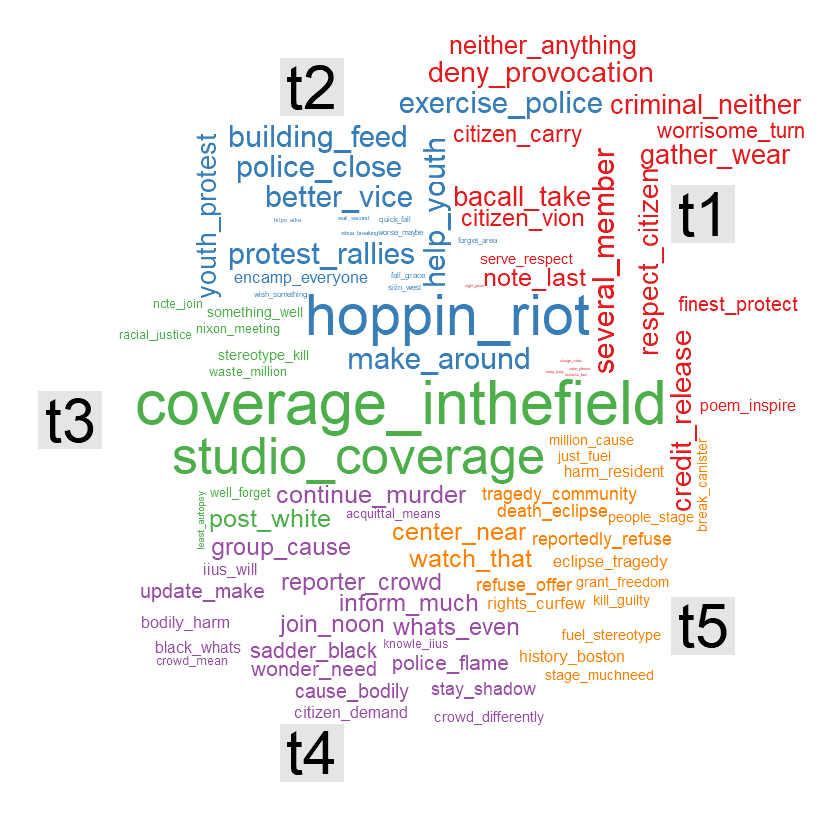

In [260]:
comparison.cloud(plot.t2, scale = c(3, 0.01), colors= useset, max.words
 = 150)

In [ ]:
Difficult to extract topics visually. Possible topics are:-
Topic 2 - rally/protest

### Document sentiments Bigrams and SVD

In [ ]:
### Extract document right metrix (topic-document "distributions")

In [261]:
svd.docs.bg <- broom::tidy_irlba(svd.k.bg, matrix = "u")

In [262]:
ncol(bigrams.tdm.sp)

[1] 288421

In [265]:
docs <- data.frame(docs = bigrams.tdm.svd$dimnames$Docs, 
                    id = seq(1, length(bigrams.tdm.svd$dimnames$Docs)))

In [266]:
docs <- docs %>% inner_join(svd.docs.bg, by = c("id" = "row"))

In [1346]:
head(docs)

docs,id
text1,1
text1396,2
text1407,3
text25509,4
text53262,5
text172615,6


In [267]:
tapply(docs$value, docs$PC, summary)

$`1`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.00e+00 0.00e+00 0.00e+00 1.29e-05 0.00e+00 6.14e-01 

$`2`
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-3.028e-01 -2.000e-08  0.000e+00 -2.620e-06  0.000e+00  1.083e-05 

$`3`
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-4.055e-02 -2.000e-08  0.000e+00 -1.230e-06  0.000e+00  2.624e-04 

$`4`
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.0000912  0.0000000  0.0000000  0.0000113  0.0000000  0.4706564 

$`5`
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.4104584  0.0000000  0.0000000 -0.0000128  0.0000000  0.0001457 


In [ ]:
### Plot document distribution - top 1000 documents per topic

In [279]:
docs.plot <- docs %>% dplyr::rename("topic" = "PC") %>%
            mutate(topic = as.character(topic))

In [281]:
docs.plot.1000 <- docs %>% dplyr::select(everything()) %>%
                            dplyr::rename("topic" = "PC") %>%
                            group_by(topic) %>%
                             arrange(desc(value)) %>%
                                slice(1:1000) %>%
                            ungroup() %>%
                            mutate(topic = as.character(topic)) %>%
                            as.data.frame()

In [285]:
plot.docs.svd <- 
ggplot(aes(x = value), data = docs.plot) +
geom_density(aes(color = topic, fill = topic)) +
labs(#title = "Topics assigned to documents has a narrow probability\n distribution", 
    x = "Left matrix components (topics assgined to documents)", y = "Count") +
theme(axis.text.x=element_text(angle=90)) +
facet_wrap(~topic, ncol = 5)

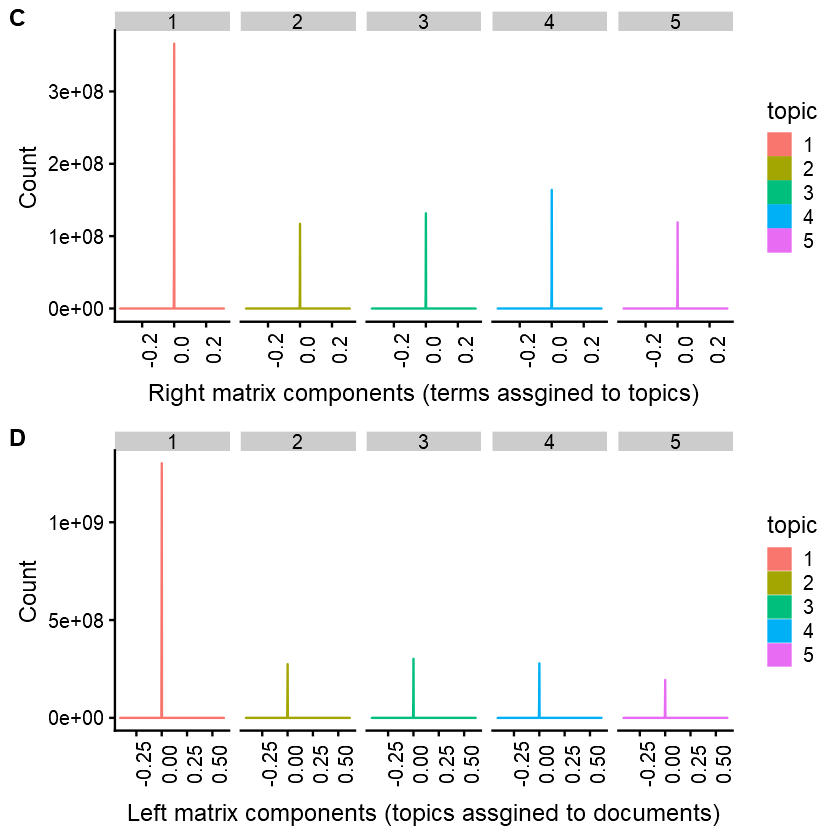

In [286]:
plot_grid(plot.terms.svd, plot.docs.svd, ncol = 1, 
          labels = c('C', 'D'),
          align = "v", axis = "l")

In [1245]:
Topics assigned to documents has a narrow probability\n distribution arour "0". 
This partly due to the nature of SVD which can return values of the order of 1e-10 on 
average.

ERROR: Error in summary.factor(X[[i]], ...): object 'value' not found


In [1375]:
docs.svd.bin$value <- ifelse(docs.svd.bin$value > 0, 1, 0)

#### Recreate document text used in LDA and SVD topic models

In [287]:
doc.names.tokens <- names(tokens)

In [1356]:
length(doc.names.tokens)

[1] 294928

In [288]:
bigrams.docs <- #as.data.frame(unlist(
    lapply(tokens, str_c, collapse = " ")#))

In [166]:
bigrams.docs.text <- as.data.frame(cbind(doc.names.tokens, bigrams.docs))

In [167]:
bigrams.docs.text$bigrams.docs  <- as.character(bigrams.docs.text$bigrams.docs)

In [1392]:
str(bigrams.docs.text)

'data.frame':	294928 obs. of  2 variables:
 $ doc.names.tokens: chr  "text1" "text2" "text3" "text4" ...
 $ bigrams.docs    : chr  "black teenage child stop refer year kill child" "please tune today kill young black male" "sick tired police kill unarmed people" "well" ...


In [ ]:
### Extract sentiment for text in the corpus

In [168]:
sent.unq.text <- sentiment.pos[c("textnum", "positive", 
                                            "negative", "neutral", "sentiment", "labels", 
                                              "full_text_low_nostop", "full_text_low")] #%>%
                                        #    distinct()
sent.unq.text$full_text_low <- trimws(sent.unq.text$full_text_low, "both")

In [169]:
doc.text_mod <- doc.udp.lem.text_mod[c("textnum", "full_text_low", "text_mod.clean",
                                       "text")] #%>% distinct()

In [1483]:
str(doc.text_mod)

'data.frame':	930682 obs. of  4 variables:
 $ textnum       : num  1110027 3848804 3356758 1350898 2232347 ...
 $ full_text_low : chr  " is over  aa and they have a bo conners " "has any aa celebrities spoken up and out about i know j cole has but who else " " aa leaders arent focusing on the disparaging facts between protesters narrative and their own  expecting ppl to follow " " aa a here are photos of the saint louis county cop who assaulted me yesterday http a " ...
 $ text_mod.clean: chr  "conner" "celebrity speak know cole else" "leader arent focus disparage fact protester narrative expect follow" "photo saint tlouis county assault yesterday http" ...
 $ text          : chr  "aa bo conner" "aa celebrity speak know j cole else" "aa leader arent focus disparage fact protester narrative expect ppl follow" "aa photo saint tlouis county cop assault yesterday http" ...


In [170]:
sent.unq.text <- sent.unq.text %>% inner_join(doc.text_mod, by = c("textnum")) %>% 
                        dplyr::select(-full_text_low.y) %>%
                        dplyr::rename("full_text_low" = "full_text_low.x")

In [171]:
sent.unq.text2 <- sent.unq.text %>% # distinct(text_mod.clean, sentiment) %>% 
                                group_by(text_mod.clean) %>%
                                summarise(sentiment = mean(sentiment),
                                         positive = first(positive),
                                         negative = first(negative),
                                         neutral = first(neutral), 
                                         labels = first(labels))

In [1558]:
nrow((sent.unq.text2))

[1] 294928

In [1543]:
nrow(bigrams.docs.text)

[1] 294928

In [172]:
bigrams.docs.text$doc.names.tokens <- unlist(bigrams.docs.text$doc.names.tokens)

In [173]:
docs.lda.bin <- bigrams.doc

In [174]:
doc.topics.lda <- docs.lda.bin %>% inner_join(bigrams.docs.text, 
                                          by = c("document" = 
                                                 "doc.names.tokens")) %>%
                                inner_join(sent.unq.text2, 
                                           by = c("bigrams.docs" = "text_mod.clean"))

In [175]:
doc.topics.lda.sent <- doc.topics.lda %>% mutate(topic.sent = gamma * sentiment)

In [176]:
docs.topic.lda.sent.5 <- doc.topics.lda.sent %>% # dplyr::rename("topic" = "PC") %>%
                        group_by(topic) %>%
                        summarise(total.topic.sent = sum(topic.sent),
                                  avg.topic.sent = mean(topic.sent)
                               #  per_pos.sent = sum(neutral)/nrow(.), 
                              #   no.docs = nrow(.)
                                 ) %>%
                        as.data.frame()

In [180]:
docs.topic.lda.sent.5

topic,total.topic.sent,avg.topic.sent
1,213.6197,0.0007406523
2,215.1152,0.0007458374
3,213.4056,0.0007399100
4,214.9221,0.0007451679
5,211.9702,0.0007349332


In [181]:
docs.topic.lda.top20.sent.5 <- doc.topics.lda.sent %>% # dplyr::rename("topic" = "PC") %>%
                        group_by(topic) %>%
                        arrange(topic, desc(gamma)) %>%
                        slice(1:20) %>%
                        summarise(total.topic.sent = sum(sentiment),
                                  avg.topic.sent = mean(sentiment)
                               #  per_pos.sent = sum(neutral)/nrow(.), 
                              #   no.docs = nrow(.)
                                 ) %>%
                        #dplyr::select(topic, gamma, sentiment) %>%
                        as.data.frame()

In [182]:
docs.topic.lda.top20.sent.5

topic,total.topic.sent,avg.topic.sent
1,-1.6501092,-0.08250546
2,-0.3474409,-0.01737205
3,-1.7027680,-0.08513840
4,-3.6229801,-0.18114901
5,-3.7517115,-0.18758558


#### SVD - Get measure of topic sentiment using topic-document classification 

In [ ]:
#### Assign document to topic = 1, if value is greater than zero, 
### otherwise 0

In [291]:
docs.svd.bin$value <- ifelse(docs.svd.bin$value > 0, 1, 0)

In [292]:
doc.topics.svd <- docs.svd.bin %>% inner_join(bigrams.docs.text, 
                                          by = c("docs" = 
                                                 "doc.names.tokens")) %>%
                                inner_join(sent.unq.text2, 
                                           by = c("bigrams.docs" = "text_mod.clean"))

Warning message:
"Column `docs`/`doc.names.tokens` joining factor and character vector, coercing into character vector"

In [293]:
doc.topics.svd.sent <- doc.topics.svd %>% mutate(topic.sent = value * sentiment)

In [ ]:
str(doc.topics.sent)

In [ ]:
### Topic sentiment based on the entire corpus

In [294]:
docs.topic.svd.sent.5 <- doc.topics.svd.sent %>% dplyr::rename("topic" = "PC") %>%
                        group_by(topic) %>%
                        summarise(total.topic.sent = sum(topic.sent),
                                  avg.topic.sent = mean(topic.sent)
                                 ) %>%
                        as.data.frame()

In [295]:
docs.topic.svd.sent.5

topic,total.topic.sent,avg.topic.sent
1,1010.47059,3.503457e-03
2,18.48986,6.410721e-05
3,29.41782,1.019961e-04
4,1063.76431,3.688235e-03
5,26.40342,9.154472e-05


In [ ]:
### Topic sentiment based on top 20 documents in each topic

In [296]:
doc.topics.top20.svd <- docs %>% dplyr::rename("topic" = "PC") %>% 
                            group_by(topic) %>%
                            arrange(topic, desc(value)) %>%
                            slice(1:20) %>%
                            inner_join(bigrams.docs.text, 
                                          by = c("docs" = 
                                                 "doc.names.tokens")) %>%
                                inner_join(sent.unq.text2, 
                                           by = c("bigrams.docs" = "text_mod.clean"))

Warning message:
"Column `docs`/`doc.names.tokens` joining factor and character vector, coercing into character vector"

In [297]:
docs.topic.top20.svd.sent.5 <- doc.topics.top20.svd %>%
                        group_by(topic) %>%
                        summarise(total.topic.sent = sum(sentiment),
                                  avg.topic.sent = mean(sentiment)
                                 ) %>%
                        as.data.frame()

In [298]:
docs.topic.top20.svd.sent.5

topic,total.topic.sent,avg.topic.sent
1,0.58107953,0.029053977
2,-0.04175203,-0.002087601
3,-0.32529035,-0.016264518
4,-2.86921284,-0.143460642
5,0.91877618,0.045938809


**LDA**

Here none of the topics have an overall positive sentiment based on the top 20 terms. This differs from the project writeup due to random seeds and/or Jupyter notebook crashing. 
The writeup returns one topic with and overall positive sentiment for the top 20 terms.However the overall concept remains of extracting positive sentiment - at locl, regional and greographic levels can sometimes be  a challenge.

**SVD**

Two topics have an overall positive sentiment for the top 20 terms - topic 1 and 5. The same challenges with reproducing exact results in th eproject document occurred.

In [ ]:
Some of these results I was not able to reproduce due to some random element. 
It is seen everytime I plot a wordcloud with or without rerunning LDA on all of the data.
See. "Run LDA on all of the data" and LDA and SVD top 20 terms per topic wordclouds.